<a href="https://colab.research.google.com/github/dhrg/linreg/blob/master/linreg_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import  linalg

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import datasets
%matplotlib inline

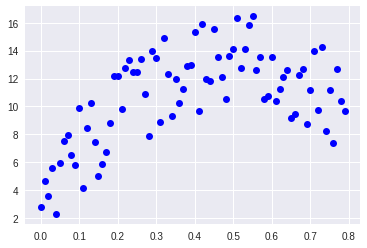

In [111]:
# lets create some synthetic data to regress
X = np.arange(0,0.8,0.01)
Y = 10*np.sin(np.pi*x)+np.random.uniform(0,7,x.shape[0])

plt.plot(x,y,'bo')

In [32]:
y.shape

(80,)

In [0]:
data = pd.DataFrame({'X0': 1, 'X1':X, 'Y': Y})

Closed form analytic solution for $X\theta=Y$ where $X$ is data matrix whose columns are linearly independent variables and $Y$ dependent variable, is

$$ \theta = (X^{T}X)^{-1}X^{T}Y.$$

$X^{T}X$ is square matrix and invertible under asusmption that is not singular (determinant is not 0). That will be when columns/rows are independent or no duplicate columns/rows exist nor any combination of columns/rows can make other column/row.   

In [0]:
X = data[['X0','X1']].values
Y = data['Y'].values

In [174]:
theta_closed = linalg.inv(X.T@X)@X.T@Y

theta_closed

array([[6.64766467],
       [9.93136107]])

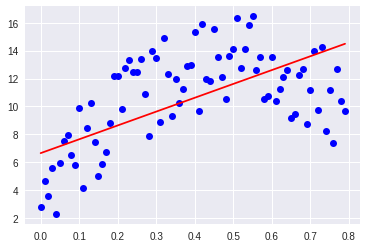

In [129]:
plt.plot(x,y,'bo', x, X@theta_closed, 'r-')


In [0]:
from sklearn.metrics import mean_squared_error as mse

In [126]:
RMSE_closed = np.sqrt(mse(Y, X@theta_closed))
print(RMSE_closed)

3.007268993047066


Closed form RMSE is 3. Lets see Gradient Descent and sklearn versions. We need cost function and derivatives of cost function. The cost function in vectorized form is: 

$$J(\theta)=\frac{1}{2m}(X\theta-Y)^{T}(X\theta-Y)$$

and then derivative also in vectorized form is: 

$$ \frac{\partial{J(\theta)}}{\partial{\theta}}=\frac{1}{m}X^{T}(X\theta-Y).$$


The learning rule or often caled LMS update rule, is:

$$\theta = \theta - \alpha\frac{\partial{J(\theta)}}{\partial{\theta}}$$ 

where $\alpha$ is learning rate.  Note in calculation of derivative (gradient), the whole dataset (all datapints of $X^{T}$) are utilized. As such this is called Batch Gradient Descent or just Gradient Descent (GD). Minibatch GD would take only subset of whole dataset to calculate gradient, and Stoschastic GD or SGD takes only single random point. SGD is option when dataset is large, while in smaller datasets (not large num of rows) one can used GD. http://cs229.stanford.edu/notes/cs229-notes1.pdf


In [0]:
# lets do minimal gradient descent

# gradient vectorized form
def grad(X,Y,theta):
  scale=1/X.shape[0]
  return scale*X.T@(X@theta-Y)

# theta init
theta = np.matrix([[0],[0]])

# gd
def gd(X,Y,theta, alpha=0.01, iter=4000):
  count=0
  for i in range(iter):
    theta = theta -alpha*grad(X,Y,theta)
    count= count+1
    
  return theta, count
    
    

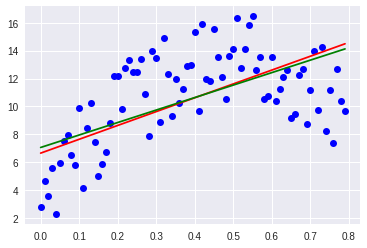

In [210]:
theta,count = gd(X,Y,theta)
plt.plot(x,y,'bo', x, X@theta_closed, 'r-', x, X@theta, 'g-')

In [211]:
RMSE_gd = np.sqrt(mse(Y, X@theta))
print(RMSE_gd)

3.0158222271347706
